In [2]:
%load_ext autoreload
%autoreload 2
%matplotlib notebook
import warnings
warnings.filterwarnings('ignore')

In [3]:
from mpl_toolkits.basemap import Basemap
import geopandas as gpd
import sys

sys.path.append('./scripts')
import analysis as an

<IPython.core.display.Javascript object>


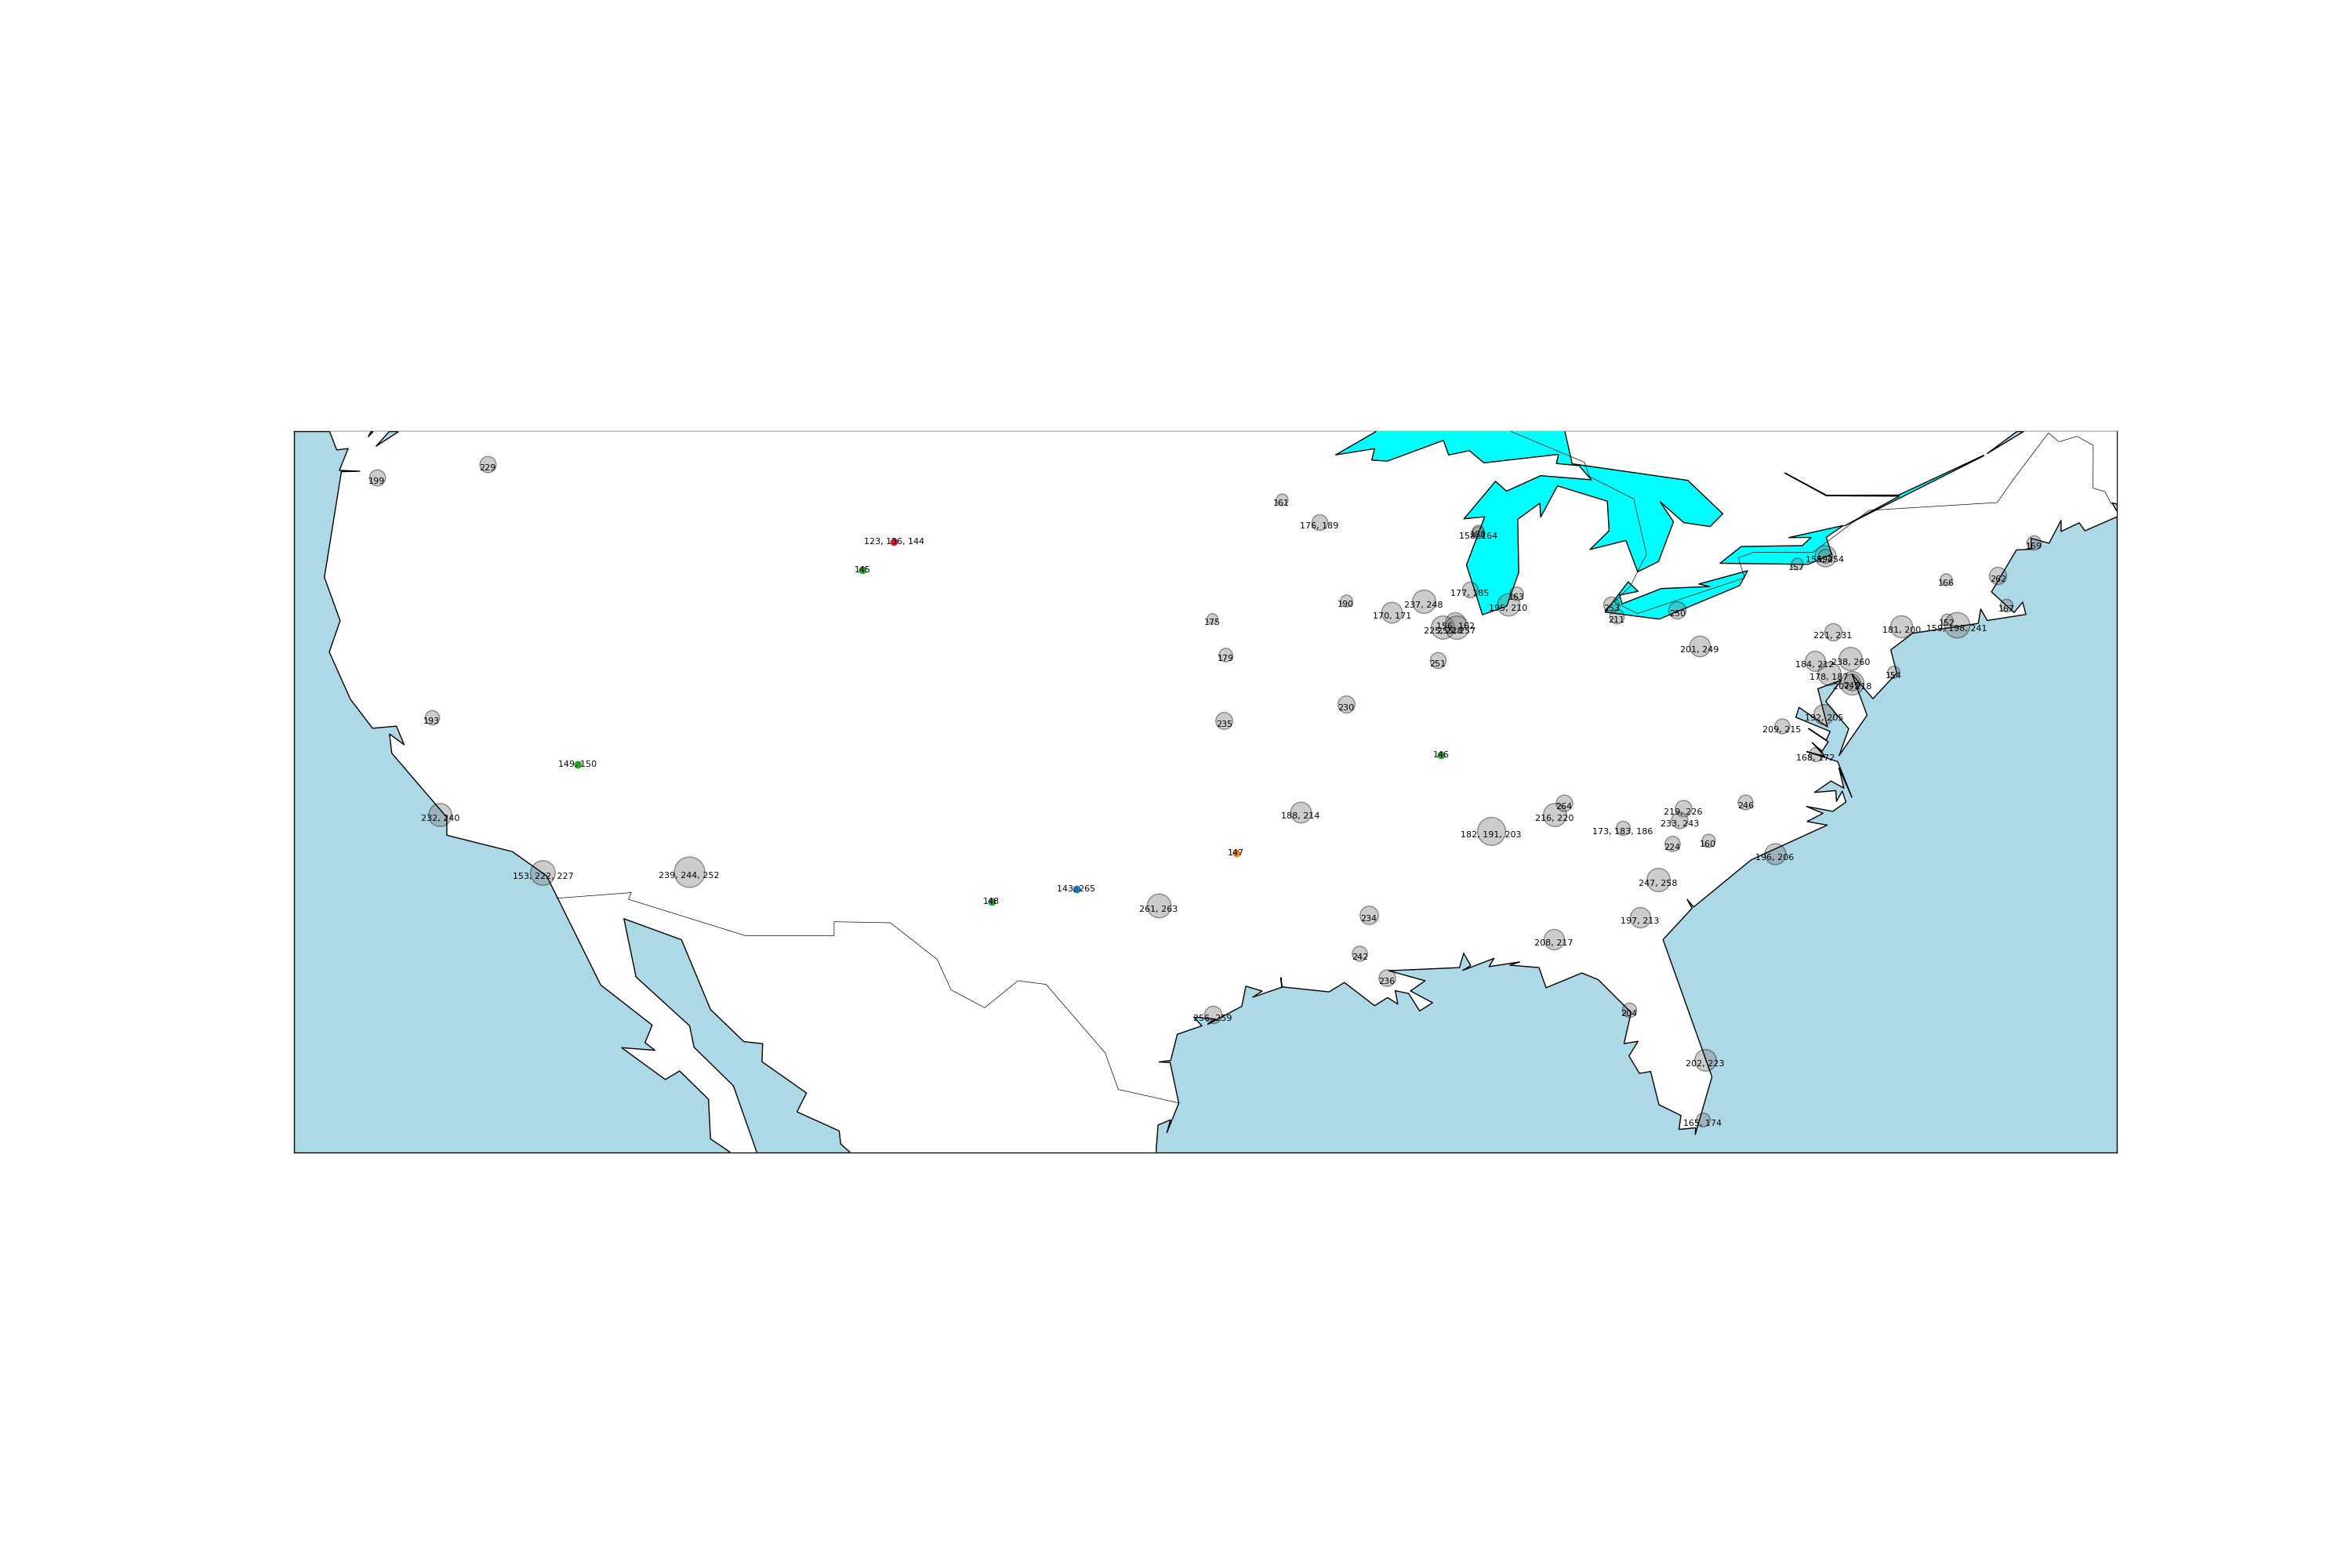

In [4]:
cur = an.get_cursor('./UNITED_STATES.sqlite')

an.plot_agents(cur)

<IPython.core.display.Javascript object>


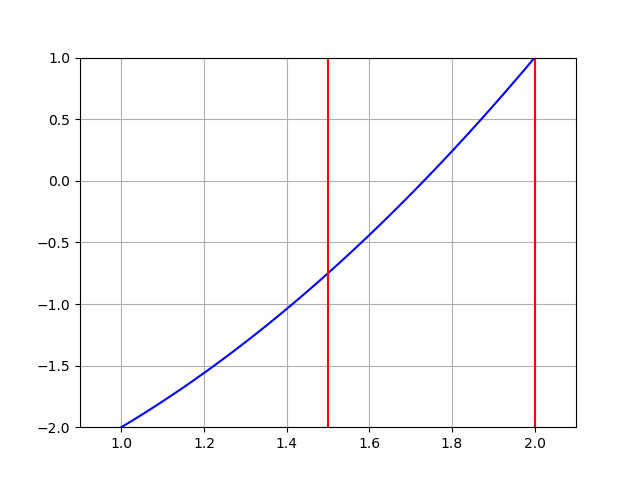

In [7]:
import matplotlib.pyplot as plt 
from matplotlib import animation
import numpy as np 

def sgn(x):
    if x > 0:
        return 1
    elif x < 0:
        return -1
    else:
        return 0

def bisect(f,a,b):
    fa = f(a)
    fb = f(b)
    p = a+(b-a)/2
    fp = f(p)
    if sgn(fa) == sgn(fp):
        return p, b
    else:
        return a, p

def bisection_method(f,a,b,n):
    for i in range(n):
        a,b = bisect(f,a,b)
    return a,b

def f(x):
    return x**2-3

xmin, xmax = 1, 2
yrange = f(xmin), f(xmax)
ymin, ymax = min(yrange), max(yrange) 
vf = np.vectorize(f)
x = np.linspace(xmin,xmax)
y = vf(x)
epsilon = 0.1
# Initialize figure
fig = plt.figure()
ax = plt.axes(xlim=(xmin-epsilon,xmax+epsilon), ylim=(ymin,ymax))
curve, = ax.plot([],[], color='blue')
left, = ax.plot([],[],color='red')
right, = ax.plot([],[],color='red')

# Figure reset between frames
def init():
    left.set_data([],[])
    right.set_data([],[])
    curve.set_data([],[])
    return left, right, curve,

# Animation of bisection
def animate(i):
    a, b = bisection_method(f,xmin,xmax,i)
    left.set_data([a,a],[ymin,ymax])
    right.set_data([b,b],[ymin,ymax])
    curve.set_data(x,y)
    return left, right, curve,

anim = animation.FuncAnimation(fig, animate, init_func=init, frames=15, interval=700, blit=True)

plt.grid()
plt.show()